In [18]:
import random

from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import skimage.io as io

In [2]:
annotations = loadmat('annotations/Annotations.mat')

In [3]:
"""
A lot of data is wrapped in single-element arrays (could be
converting from .mat to numpy array). This will make it easier
to work with the data.
"""
train = [{
    'filename'  : sample[0][0],
    'folder'    : sample[1][0],
    'image_size': {
        'width' : sample[2][0][0][0][0][0],
        'height': sample[2][0][0][1][0][0]
    },
    'original_database': sample[3][0][0][0][0],
    'person': [{
        # format [x1 y1 x2 y2]
        'body_bbox': [i for i in person[0][0]],# can keep this numpy array
        'annotations_categories': [
            category[0] for category in person[1][0][0][0][0]
        ],
        'annotations_continuous': {
            'valence'  : person[2][0][0][0][0][0],
            'arousal'  : person[2][0][0][1][0][0],
            'dominance': person[2][0][0][2][0][0],
        },
        'gender': person[3][0],
        'age': person[4][0]
    } for person in sample[4][0]]
} for sample in annotations['train'][0]]

In [50]:
def print_train_sample(sample):
    print("filename         :", sample['filename'])
    print("folder           :", sample['folder'])
    print("image_size       :", str(sample['image_size']['width'])
          + " x " + str(sample['image_size']['height']))
    print("original_database:", sample['original_database'])
    tab = "    "
    for i, person in enumerate(sample['person']):
        print(tab + "----- PERSON " + str(i + 1) + " -----")
        print(tab + "body_bbox             :", str(person['body_bbox']))
        print(tab + "annotations_categories:", 
              str(person['annotations_categories']))
        print(tab + "annotations_continuous: ",
              str(person['annotations_continuous']))
        print(tab + "gender               : ", person['gender'])
        print(tab + "age                  : ", person['age'])
        
def visualize_train_sample(sample):
    fig, ax = plt.subplots(1)
    img_path = 'emotic/' + sample['folder'] + '/' + sample['filename']
    img = io.imread(img_path)
    ax.imshow(img)
    for i, person in enumerate(sample['person']):
        bbox_x = person['body_bbox'][0]
        bbox_y = person['body_bbox'][1]
        bbox_width  = person['body_bbox'][2] - person['body_bbox'][0]
        bbox_height = person['body_bbox'][3] - person['body_bbox'][1]
        ax.add_patch(Rectangle(xy=(bbox_x, bbox_y), width=bbox_width, height=bbox_height,
                               edgecolor='red', fill=False, linewidth=4))
        emotions = str(i + 1) + ":" + str(person['annotations_categories'])
        ax.text(x=bbox_x, y=bbox_y, s=emotions, color="yellow")
    plt.show()

Number of training samples: 17077
Example train sample:
filename         : e2lzd2vckl03ubex7l.jpg
folder           : emodb_small/images
image_size       : 541 x 800
original_database: emodb_small
    ----- PERSON 1 -----
    body_bbox             : [210.0, 1.0, 367.0, 227.0]
    annotations_categories: ['Affection', 'Sadness', 'Sympathy']
    annotations_continuous:  {'valence': 1, 'arousal': 7, 'dominance': 2}
    gender               :  Male
    age                  :  Adult
    ----- PERSON 2 -----
    body_bbox             : [51.0, 10.0, 221.0, 536.0]
    annotations_categories: ['Disquietment', 'Sadness', 'Suffering', 'Sympathy']
    annotations_continuous:  {'valence': 4, 'arousal': 4, 'dominance': 4}
    gender               :  Male
    age                  :  Adult
    ----- PERSON 3 -----
    body_bbox             : [536.0, 16.0, 800.0, 541.0]
    annotations_categories: ['Disquietment', 'Sadness', 'Sympathy']
    annotations_continuous:  {'valence': 3, 'arousal': 5, 'dominanc

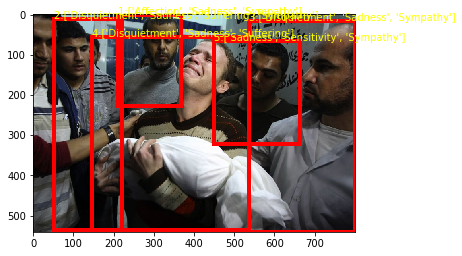

In [51]:
print("Number of training samples:", len(train))
print("Example train sample:")
sample = random.choice(train)

print_train_sample(sample)
visualize_train_sample(sample)

min:  1
max:  14


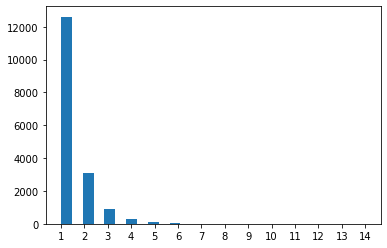

In [67]:
# Visualize number of people per image

num_people = [len(sample['person']) for sample in train]
minp = min(num_people)
maxp = max(num_people)
print("min: ", minp)
print("max: ", maxp)
# * 2 shows distinct bars because .5 counts are shown (which are zero)
plt.hist(num_people, bins= (maxp - minp + 1) * 2)
plt.xticks(range(minp, maxp + 1))
plt.show()